# Importing the Libraries

In [1]:
import warnings as w
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
w.filterwarnings('ignore')


## Reading the dataset

## Details of the data set
### The data set is a collection of 48,895 AirBNB listings in New York City. The data set contains 16 columns and 48,895 rows. The columns are as follows:

> 1 . **id** - Unique ID for each listing

> 2 . **name** - Name of the listing

> 3 . **host_id** - Unique ID for the host

> 4 . **host_name** - Name of the host

> 5 . **neighbourhood_group** - Location of the listing

> 6 . **neighbourhood** - Location of the listing

> 7 . **latitude** - Latitude of the listing

> 8 . **longitude** - Longitude of the listing

> 9 . **room_type** - Type of room

> 10 . **price** - Price of the listing

> 11 . **minimum_nights** - Minimum number of nights to book

> 12 . **number_of_reviews** - Number of reviews for the listing

> 13 . **last_review** - Date of the last review

> 14 . **reviews_per_month** - Number of reviews per month

> 15 . **calculated_host_listings_count** - Number of listings for the host

> 16 . **availability_365** - Number of days the listing is available for booking


In [3]:
df = pd.read_csv(
    r"C:\Users\harsh\College\ML-Assignments\Data Sets\MLK\AB_NYC_2019.csv")


In [7]:
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Printing the data statistics.

In [8]:
df.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Printing the sturcutre of Data

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Checking the no of null values in dataset

In [10]:
df.isna().sum().sort_values(ascending=False)


last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

> #### We have most of the columns with 100% data, so we can fill the missing values with the mean of the column


## Cleaning the Data

In [16]:
df.id = df.id.astype(str)

df.host_id = df.host_id.astype(str)

df.room_type = df.room_type.astype("category")


In [17]:
df["reviews_per_month"].replace(
    np.NaN, df["reviews_per_month"].median(), inplace=True)


In [18]:
df["last_review"].replace(np.NaN, df["last_review"].mode()[0], inplace=True)


In [19]:
df.dropna(axis=0, inplace=True)


In [20]:
df.isna().sum().sort_values(ascending=False)


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [22]:
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,0.72,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [23]:
# We have dropped the columns which are not required for our analysis

df.drop(["id", "name", "host_name", "neighbourhood"], axis=1, inplace=True)


In [24]:
df = pd.get_dummies(
    data=df, columns=["room_type", "neighbourhood_group"], drop_first=True
)
df.last_review = pd.to_datetime(df["last_review"])


In [27]:
df.head()


,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Private room,room_type_Shared room,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,2787,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,1,0,1,0,0,0
1,2845,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,0,0,0,1,0,0
2,4632,40.80902,-73.94190,150,3,0,2019-06-23,0.72,1,365,1,0,0,1,0,0
3,4869,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,0,0,1,0,0,0
4,7192,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,0,0,0,1,0,0


## Checking the host_ID's which have most listing.

In [28]:
m3 = (
    df[["host_id", "calculated_host_listings_count"]]
    .groupby("host_id")
    .sum()
    .sort_values(by="calculated_host_listings_count", ascending=False)
)


In [30]:
m3.reset_index(inplace=True)
m3.columns = ["host_id", "count"]


In [31]:
m3 = m3.iloc[:15, :]


## Ploting the top 500 host_ID's which have most no of listings.

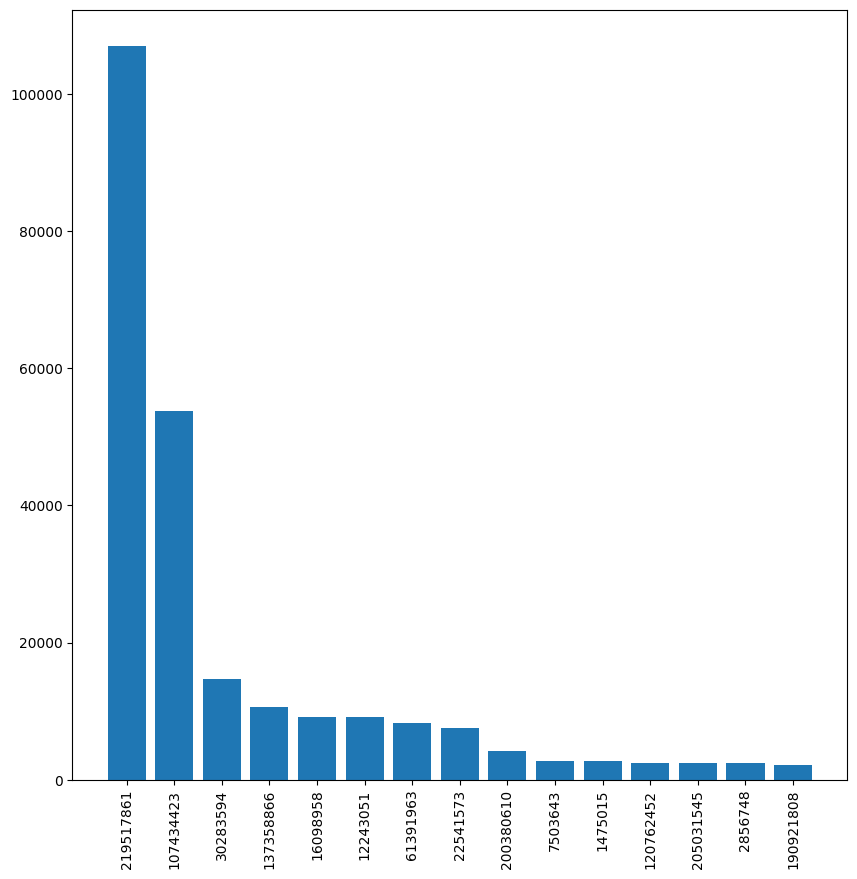

In [33]:
plt.figure(figsize=(10, 10))
plt.bar(m3["host_id"], m3["count"])
plt.xticks(rotation=90)


> * These are the top 15 host_ID's which have the highest no of calculated host listings.